In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Utils

## Graphs

In [2]:

def get_values_statistics(df, column: str)-> tuple:
    """
    Calcula tres valores.
    
    Argumentos:
    df : dataframe
    y : str
        Nome da coluna a ser avaliada
        
    Retorna:
    max_value : float
        maior valor.
    min_value : float
        menor valor.
    mean_value: float
        média
    standard_deviation: float
        variação
    """
    
    max_value = df[column].max()
    min_value = df[column].min()
    mean_value = df[column].mean()
    standard_deviation = df[column].std()
    
    return (max_value, min_value, mean_value, standard_deviation)

def boxplot(df, column: str, title: str = '')-> None:
    plt.figure(figsize=(6, 3))
    plt.boxplot(df[column], vert=False)
    plt.title(title)
    plt.show()

def violinplot(df, column: str, title: str = '', x_range=None)-> None:
    plt.figure(figsize=(6, 3))
    plt.violinplot(df[column], vert=False)
    plt.xlabel(column)
    plt.title(title)
    if x_range is not None:
        plt.xlim(x_range)
        
    plt.show()

def scatter_plot(df, column_x: str, column_y: str, label_x=None, label_y=None, title='Gráfico de Dispersão', x_range=None, y_range=None):
    if label_x is None:
        label_x = column_x

    if label_y is None:
        label_y = column_y

    plt.figure(figsize=(10, 4))
    plt.scatter(df[column_x], df[column_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    
    if x_range is not None:
        plt.xlim(x_range)
    
    if y_range is not None:
        plt.ylim(y_range)
        
    plt.grid(True)
    plt.show()
    
def bar_plot(df, column_x: str, column_y: str, label_x: str=None, label_y: str=None, title: str='Gráfico de Barras')->None:
    if label_x is None:
        label_x = column_x

    if label_y is None:
        label_y = column_y

    plt.figure(figsize=(10, 6))
    plt.bar(df[column_x], df[column_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.xticks(rotation=90)  
    plt.grid(True)
    plt.show()

def bar_plot_custom_intervals(data, column: str, intervals=None, interval_size=50, xlabel='Intervalos', ylabel='Contagem', title='Contagem de Valores por Intervalo'):
    
    data = data.dropna(subset=[column])
    data[column] = data[column].astype(int)

    if intervals:
        custom_intervals = pd.IntervalIndex.from_tuples(intervals)
        bins = custom_intervals
    else:
        bins = range(0, data[column].max() + interval_size, interval_size)

    intervals = pd.cut(data[column], bins=bins)
    counts = intervals.value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', width=0.8)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(False)
    
    for i, val in enumerate(counts):
        plt.text(i, val + 0.2, str(val), ha='center', va='bottom')
    
    plt.show()

def scatter_plot_by_group(df, column_to_groupBy: str, column_y, mapping: dict, title: str='', label_y: str = '', y_range = None)-> None:
    if label_y is None:
        label_y = column_y
        
    groups = df.groupby(column_to_groupBy)
    plt.figure(figsize=(12, 8))
    for group_name, group_values in groups:
        plt.violinplot(group_values[column_y], positions=[group_name], showmedians=True, showextrema=True)
    
    plt.xticks(ticks=list(mapping.values()), labels=list(mapping.keys()))
    
    plt.title(title)
    plt.ylim(y_range)
    plt.ylabel(label_y)
    plt.grid(False)
    plt.show()

def create_table(df, title: str = 'Tabela de Tempos de API'):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 2.0)
    plt.subplots_adjust(top=0.8)
    
    plt.title(title)
    plt.show()


# Analysis

In [3]:
df_results_graphql = pd.read_csv('../../../grafhql-rest-experimento/scripts/dataset/api_grafh_results.csv', sep=',')
df_results_rest = pd.read_csv('../../../grafhql-rest-experimento/scripts/dataset/api_rest_results.csv', sep=',')

## QUERY 1

In [4]:
df_results_graphql['graphql_size'].describe()
df_results_graphql['graphql_time'].std()

max_graphQL_size, min_graphQL_size, mean_graphQL_size, std_graphQL_size = get_values_statistics(df_results_graphql[df_results_graphql['type_query'] == 1], 'graphql_size')
max_graphQL_time, min_graphQL_time, mean_graphQL_time, std_graphQL_time = get_values_statistics(df_results_graphql[df_results_graphql['type_query'] == 1], 'graphql_time')
max_rest_time, min_rest_time, mean_rest_time, std_rest_time = get_values_statistics(df_results_rest[df_results_rest['type_query'] == 1], 'rest_time')
max_rest_size, min_rest_size, mean_rest_size, std_rest_size = get_values_statistics(df_results_rest[df_results_rest['type_query'] == 1], 'rest_size')

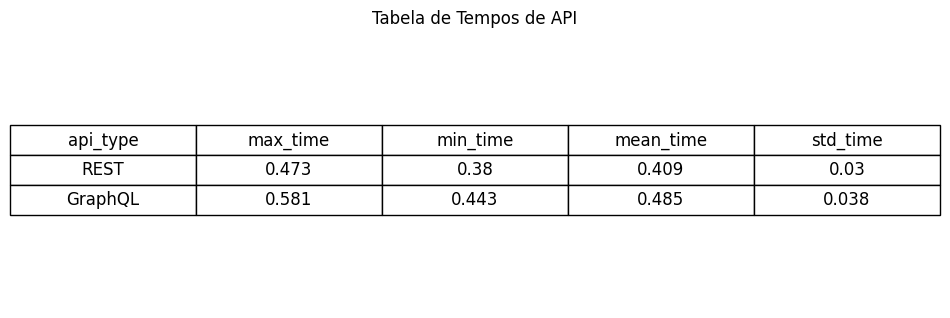

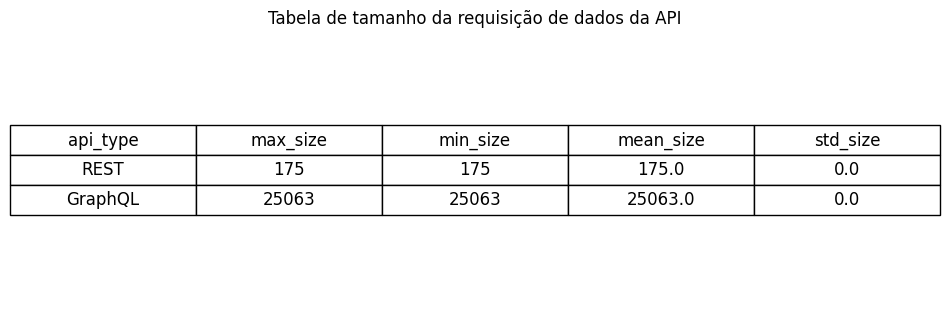

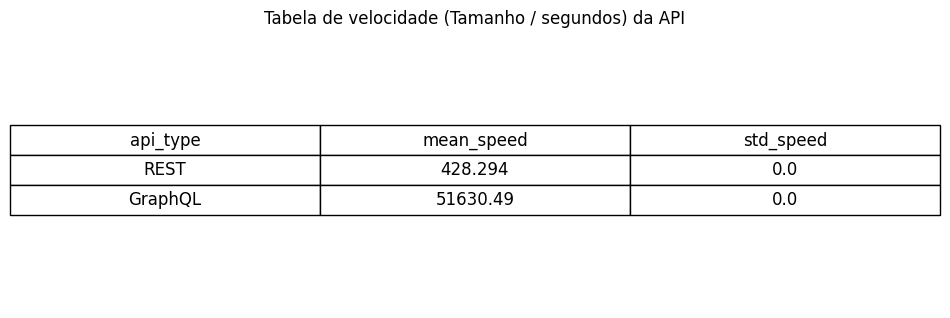

In [5]:
data_size = {
    'api_type': ['REST', 'GraphQL'],
    'max_size': [round(max_graphQL_size, 3), round(max_rest_size,3)],
    'min_size': [round(min_graphQL_size,3), round(min_rest_size,3)],
    'mean_size': [round(mean_graphQL_size,3), round(mean_rest_size,3)],
    'std_size': [round(std_graphQL_size,3), round(std_rest_size,3)],
}

data_time = {
    'api_type': ['REST', 'GraphQL'],
    'max_time': [round(max_graphQL_time, 3), round(max_rest_time,3)],
    'min_time': [round(min_graphQL_time,3), round(min_rest_time,3)],
    'mean_time': [round(mean_graphQL_time,3), round(mean_rest_time,3)],
    'std_time': [round(std_graphQL_time,3), round(std_rest_time,3)],
}

data_fraction = {
    'api_type': ['REST', 'GraphQL'],
    'mean_speed': [round(mean_graphQL_size/mean_graphQL_time,3), round(mean_rest_size/mean_rest_time,3)],
    'std_speed': [round(std_graphQL_size/std_graphQL_time,3), round(std_rest_size/std_rest_time,3)],
}

df_size = pd.DataFrame(data_size)
df_time = pd.DataFrame(data_time)
df_fraction = pd.DataFrame(data_fraction)

create_table(df_time)
create_table(df_size, title="Tabela de tamanho da requisição de dados da API")
create_table(df_fraction, title="Tabela de velocidade (Tamanho / segundos) da API")

## QUERY 2

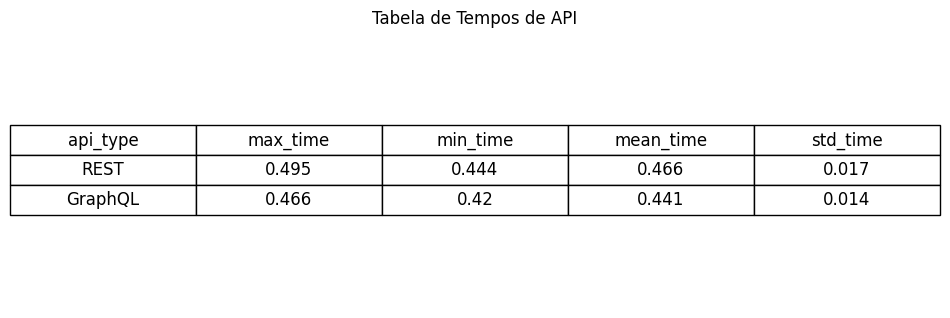

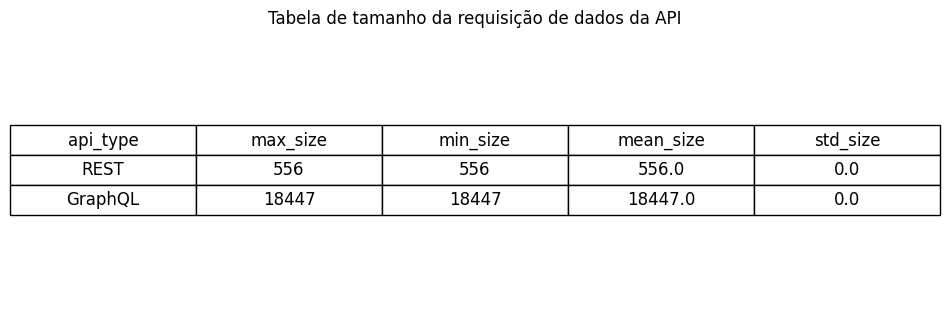

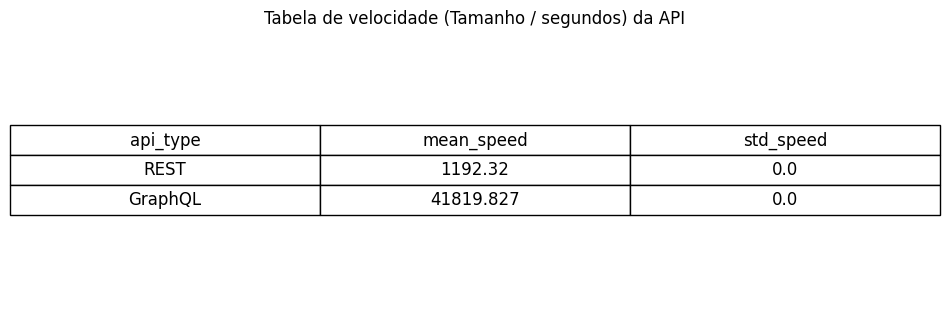

In [6]:
max_graphQL_size, min_graphQL_size, mean_graphQL_size, std_graphQL_size = get_values_statistics(df_results_graphql[df_results_graphql['type_query'] == 2], 'graphql_size')
max_graphQL_time, min_graphQL_time, mean_graphQL_time, std_graphQL_time = get_values_statistics(df_results_graphql[df_results_graphql['type_query'] == 2], 'graphql_time')
max_rest_time, min_rest_time, mean_rest_time, std_rest_time = get_values_statistics(df_results_rest[df_results_rest['type_query'] == 2], 'rest_time')
max_rest_size, min_rest_size, mean_rest_size, std_rest_size = get_values_statistics(df_results_rest[df_results_rest['type_query'] == 2], 'rest_size')

data_size = {
    'api_type': ['REST', 'GraphQL'],
    'max_size': [round(max_graphQL_size, 3), round(max_rest_size,3)],
    'min_size': [round(min_graphQL_size,3), round(min_rest_size,3)],
    'mean_size': [round(mean_graphQL_size,3), round(mean_rest_size,3)],
    'std_size': [round(std_graphQL_size,3), round(std_rest_size,3)],
}

data_time = {
    'api_type': ['REST', 'GraphQL'],
    'max_time': [round(max_graphQL_time, 3), round(max_rest_time,3)],
    'min_time': [round(min_graphQL_time,3), round(min_rest_time,3)],
    'mean_time': [round(mean_graphQL_time,3), round(mean_rest_time,3)],
    'std_time': [round(std_graphQL_time,3), round(std_rest_time,3)],
}

data_fraction = {
    'api_type': ['REST', 'GraphQL'],
    'mean_speed': [round(mean_graphQL_size/mean_graphQL_time,3), round(mean_rest_size/mean_rest_time,3)],
    'std_speed': [round(std_graphQL_size/std_graphQL_time,3), round(std_rest_size/std_rest_time,3)],
}

df_size = pd.DataFrame(data_size)
df_time = pd.DataFrame(data_time)
df_fraction = pd.DataFrame(data_fraction)

create_table(df_time)
create_table(df_size, title="Tabela de tamanho da requisição de dados da API")
create_table(df_fraction, title="Tabela de velocidade (Tamanho / segundos) da API")

## QUERY 3

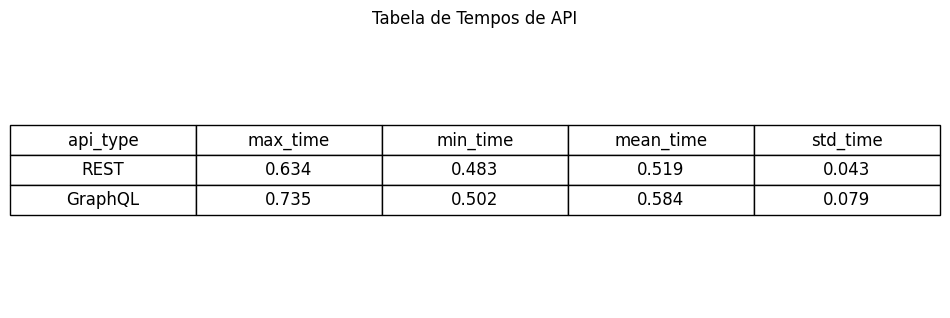

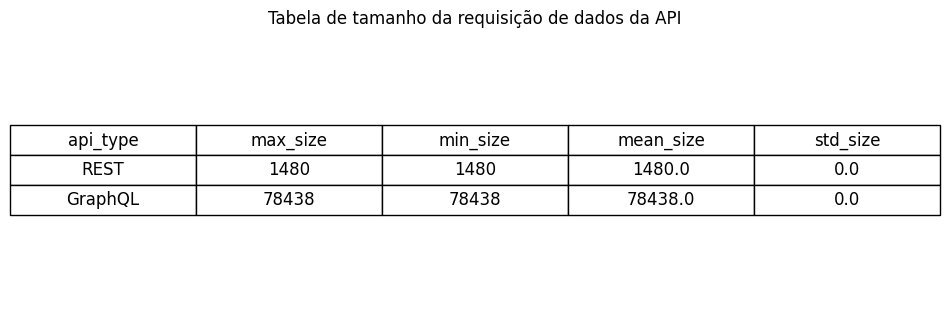

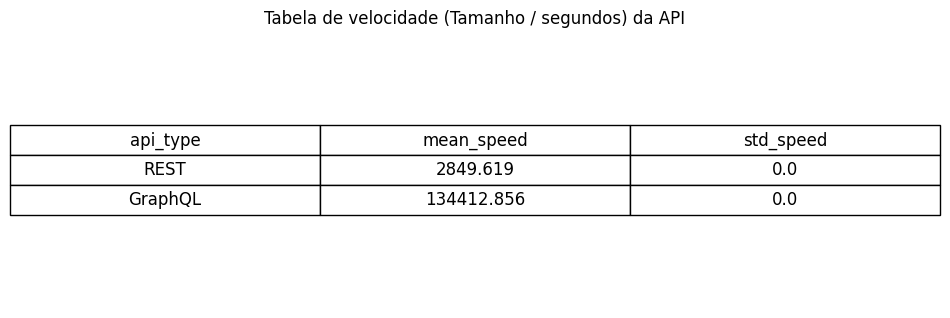

In [7]:
max_graphQL_size, min_graphQL_size, mean_graphQL_size, std_graphQL_size = get_values_statistics(df_results_graphql[df_results_graphql['type_query'] == 3], 'graphql_size')
max_graphQL_time, min_graphQL_time, mean_graphQL_time, std_graphQL_time = get_values_statistics(df_results_graphql[df_results_graphql['type_query'] == 3], 'graphql_time')
max_rest_time, min_rest_time, mean_rest_time, std_rest_time = get_values_statistics(df_results_rest[df_results_rest['type_query'] == 3], 'rest_time')
max_rest_size, min_rest_size, mean_rest_size, std_rest_size = get_values_statistics(df_results_rest[df_results_rest['type_query'] == 3], 'rest_size')

data_size = {
    'api_type': ['REST', 'GraphQL'],
    'max_size': [round(max_graphQL_size, 3), round(max_rest_size,3)],
    'min_size': [round(min_graphQL_size,3), round(min_rest_size,3)],
    'mean_size': [round(mean_graphQL_size,3), round(mean_rest_size,3)],
    'std_size': [round(std_graphQL_size,3), round(std_rest_size,3)],
}

data_time = {
    'api_type': ['REST', 'GraphQL'],
    'max_time': [round(max_graphQL_time, 3), round(max_rest_time,3)],
    'min_time': [round(min_graphQL_time,3), round(min_rest_time,3)],
    'mean_time': [round(mean_graphQL_time,3), round(mean_rest_time,3)],
    'std_time': [round(std_graphQL_time,3), round(std_rest_time,3)],
}

data_fraction = {
    'api_type': ['REST', 'GraphQL'],
    'mean_speed': [round(mean_graphQL_size/mean_graphQL_time,3), round(mean_rest_size/mean_rest_time,3)],
    'std_speed': [round(std_graphQL_size/std_graphQL_time,3), round(std_rest_size/std_rest_time,3)],
}

df_size = pd.DataFrame(data_size)
df_time = pd.DataFrame(data_time)
df_fraction = pd.DataFrame(data_fraction)

create_table(df_time)
create_table(df_size, title="Tabela de tamanho da requisição de dados da API")
create_table(df_fraction, title="Tabela de velocidade (Tamanho / segundos) da API")